In [4]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
%matplotlib inline

d:\measuring\data


#### Stage 0: ESR

In [3]:
execfile(r'D:/measuring/analysis/scripts/espin/simple_esr_fit.py')

NameError: name 'subplot' is not defined

#### Stage 1: SSRO

SSRO calibration :  20160510/130835
max. F = (96.53 +/- 0.36)% at t=8 us
	ms_0 = (94.58 +/- 0.32)%
	ms_1 = (98.48 +/- 0.17)%
Threshold is 96.6


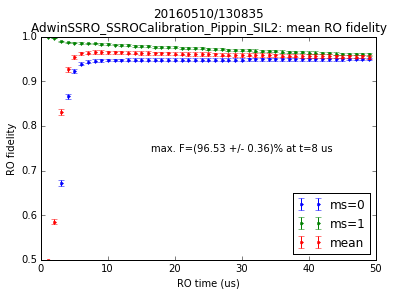

In [7]:
ssro.ssrocalib(plot_photon_ms0=False)
print 'Threshold is 96.6'


0.066702528241


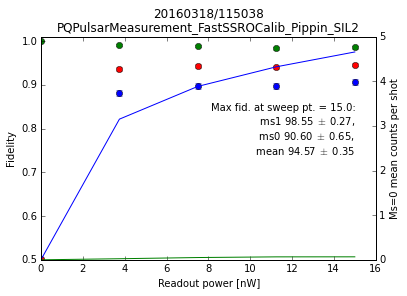

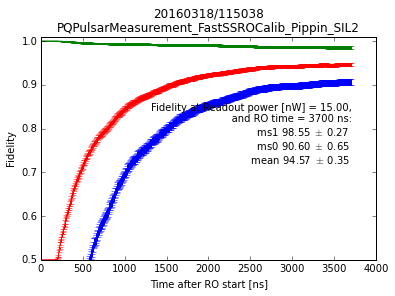

In [4]:
pqsequence.fast_ssro_calib(RO_length_ns=3700, plot_sweep_index=4)
#pqsequence.fast_ssro_calib(folder='D:/measuring/data/20150226/162913_PQPulsarMeasurement_FastSSROCalib_Pippin_SIL1', RO_length_ns=5000, plot_sweep_index=3)

#### Stage 3.1: Dark ESR

d:\measuring\data\20160111\112129_AdwinSSRO_SSROCalibration_Pippin_SIL1
fitting with 2 splittings
Converged with chi squared  0.0428566437338
degrees of freedom, dof  95
RMS of residuals (i.e. sqrt(chisq/dof))  0.0212396460803
Reduced chisq (i.e. variance of residuals)  0.000451122565618

fitted parameters at minimum, with 68% C.I.:
 0 a              0.989590 +/-   0.003264
 1 A              0.047880 +/-   0.005702
 2 sigma          0.000418 +/-   0.000050
 3 x0             4.090364 +/-   0.000044
 4 s0             0.002086 +/-   0.000159
 5 s1             0.002154 +/-   0.000057

correlation matrix:
               a         A         sigma     x0        s0        s1        
         a  1.000000
         A  0.367302  1.000000
     sigma  0.382756 -0.515654  1.000000
        x0  0.200926  0.685963 -0.419191  1.000000
        s0  0.000685 -0.258718  0.256212  0.000239  1.000000
        s1 -0.000288  0.219522 -0.217019  0.000726 -0.698678  1.000000



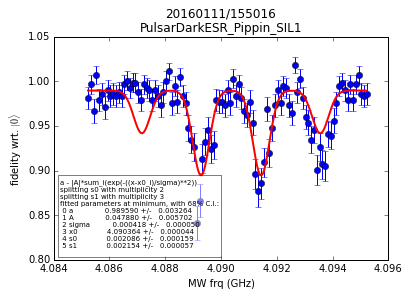

In [94]:
execfile(r'D:\measuring\analysis\scripts\espin\dark_esr_analysis_bell.py')

#### Stage 3.2: Pi pulse multiplicity 1

minimal point: 0.717


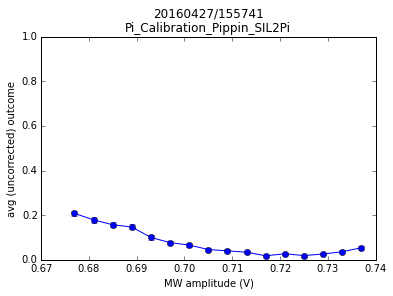

In [5]:
folder= tb.latest_data('Pi_Calibration')
a=sequence.SequenceAnalysis(folder)
a.get_sweep_pts()
a.get_readout_results(name='ssro')
ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')
ax.set_ylim(0.0,1.0)
print 'minimal point:',a.sweep_pts[np.argmin(a.normalized_ssro)]

# Stage 3.3: Pi pulse multiplicity 15

[ 0.208  0.179  0.157  0.147  0.1    0.077  0.066  0.046  0.04   0.034
  0.018  0.027  0.019  0.026  0.036  0.054]
min x =  0.717
min y = 0.00172860847018


TypeError: 'int' object has no attribute '__getitem__'

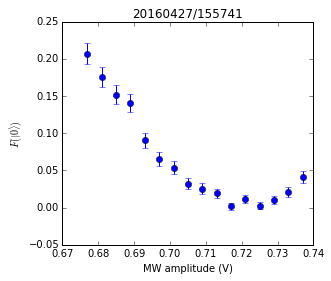

In [7]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('Pi_Calibration')
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
ymin=0.0
ymax = 1
fit=calibration_tools.fit_parabolic(folder, x0_guess=0.72,a_guess=2.,ax=ax,info_xy=(0.92,ymin-(ymax-ymin)*0.35))
fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
ax.set_ylim(ymin,ymax)

print 'Pi pulse calib. 15 rep. from : {} '.format(tb.timestamp_from_datetime(tb.get_datetime_from_folder(folder)))

print 'Fidelity {:.1f} +/- {:.1f}'.format(fit['params'][0]*100., fit['error'][0]*100.)
print '\tFitted minimum at {:.3f} V'.format(fit['params'][2])


#### Stage 3.4 Pi/2 calibration

d:\measuring\data\20160112\151649_AdwinSSRO_SSROCalibration_Pippin_SIL1
[ 0.314  0.338  0.362  0.386  0.41   0.434  0.458  0.482  0.506  0.53
  0.554]
Converged with chi squared  0.00343570137656
degrees of freedom, dof  9
RMS of residuals (i.e. sqrt(chisq/dof))  0.0195382854262
Reduced chisq (i.e. variance of residuals)  0.000381744597396

fitted parameters at minimum, with 68% C.I.:
 0 m             -3.020977 +/-   0.077621
 1 x0             0.437336 +/-   0.001952

correlation matrix:
               m         x0        
         m  1.000000
        x0  0.043910  1.000000



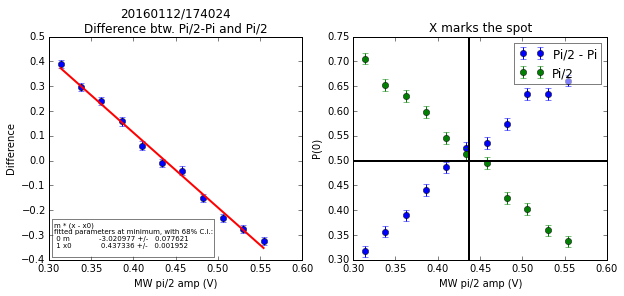

In [115]:
execfile(r'D:\measuring\analysis\scripts\espin\calibration_pi2_CORPSE.py')

In [19]:
x0=0.8837
m=-1.195752
BellOffset=0.03
print 'msmt_param_Bell_Offset Pippin LT3', -BellOffset*m/2


msmt_param_Bell_Offset Pippin LT3 0.01793628


###Stage 3.42 Pi/2 calibration

d:\measuring\data\20151230\100325_AdwinSSRO_SSROCalibration_Pippin_SIL1
[ 0.8326  0.8534  0.8872  0.9056  0.9152  0.9212  0.9202  0.9138  0.9054
  0.8844  0.862 ]
min x =  0.77
min y = 0.869732620321
d:\measuring\data\20151230\100325_AdwinSSRO_SSROCalibration_Pippin_SIL1
[ 0.8326  0.8534  0.8872  0.9056  0.9152  0.9212  0.9202  0.9138  0.9054
  0.8844  0.862 ]
min x =  0.77
min y = 0.869732620321
Pi/2 pulse calib. 15 rep. from : 20151230100541 
Fidelity 0.035 +/- 0.002
	Fitted minimum at 0.847 V


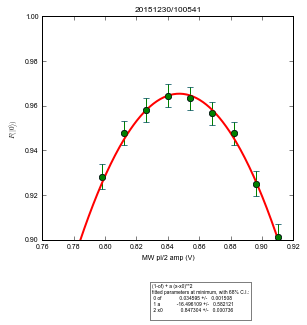

In [89]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('Pi2_Calibration')
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
ymin=0.9
ymax = 1
fit=calibration_tools.fit_parabolic(folder, x0_guess=0.84,a_guess=-2.,ax=ax,info_xy=(0.83,ymin-(ymax-ymin)*0.35))
fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
ax.set_ylim(ymin,ymax)

print 'Pi/2 pulse calib. 15 rep. from : {} '.format(tb.timestamp_from_datetime(tb.get_datetime_from_folder(folder)))

print 'Fidelity {:.3f} +/- {:.3f}'.format(fit['params'][0], fit['error'][0])
print '\tFitted minimum at {:.3f} V'.format(fit['params'][2])

#### Stage 4.1: Bell echo

[ 0.0206  0.0192  0.0184  0.0154  0.021   0.0194  0.0178  0.0206  0.0234
  0.0226]
d:\measuring\data\20151211\094709_AdwinSSRO_SSROCalibration_Pippin_SIL1


(0.0, 0.02)

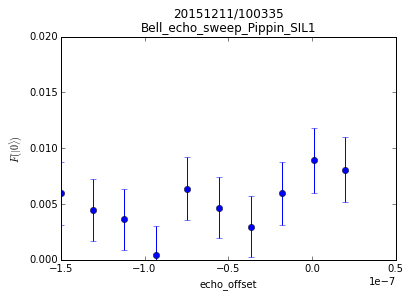

In [25]:
folder= tb.latest_data('echo')
a=sequence.SequenceAnalysis(folder)
a.get_sweep_pts()
b = a.get_readout_results(name='ssro')
print b
a.get_electron_ROC( )
ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')
ax.set_ylim(0.,0.02)
#ax.set_ylim(-0.02,0.02)

d:\measuring\data


C:\Canopy\User\lib\site-packages\matplotlib\__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


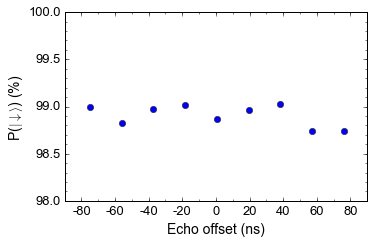

In [26]:
execfile(r'K:/ns/qt/Diamond/Eigenpapers/15-Bell/SOM/figures/DD/plot_Bell_echo_sweep.py')

#### Stage 4.2: Random MW RO correlation

In [ ]:
open notebook Bell RND check

#### Stage 4.3: SP COrrelations